In [1]:
from astropy.io import fits
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
from astropy.time import Time

In [33]:
dat_files = glob.glob('../data/*/results/*combined*.dat')
print len(dat_files)

720


In [67]:
#construct DataFrame
filts = []
anneal_mjds = []
dates_obs = []
thresholds = []
lower_bounds = []
num_pix_c1 = []
num_pix_c2 = []
num_pix_tot = []

for i, f in enumerate(dat_files):
    fname = os.path.basename(f.replace('.dat','')).split('_')
    fname = fname[2:]
    filts.append(fname[0])
    anneal_mjds.append(fname[1])
    dates_obs.append(fname[2])
    thresholds.append(fname[3])
    lower_bounds.append(fname[4])    
    df = pd.read_csv(f)
    num_pix_c1.append(len(df[df['#chip'] == 1]))
    num_pix_c2.append(len(df[df['#chip'] == 2]))
    num_pix_tot.append(len(df))

print set(dates_obs)
dates_obs_mjd = Time(dates_obs).mjd

dat = {'filter':filts,'anneal_mjd':anneal_mjds,'date_obs':dates_obs_mjd,'upper_bound':thresholds,
       'lower_bound':lower_bounds,'num_pix_c1':num_pix_c1,'num_pix_c2':num_pix_c2,'num_pix_tot':num_pix_tot}

cols=['filter', 'anneal_mjd', 'date_obs', 'lower_bound','upper_bound', 'num_pix_tot', 'num_pix_c1', 'num_pix_c2']

dat_Frame = pd.DataFrame(data=dat,index=None)
dat_Frame = dat_Frame[cols]
#print dat_Frame

set(['2013-03-06', '2012-12-02', '2013-03-14', '2012-12-29', '2013-03-25', '2012-12-09', '2013-04-29', '2013-01-26', '2013-01-25', '2013-03-31', '2013-02-13', '2013-01-17', '2013-01-07', '2013-02-22', '2013-02-25', '2013-04-20', '2013-03-23', '2013-02-03'])


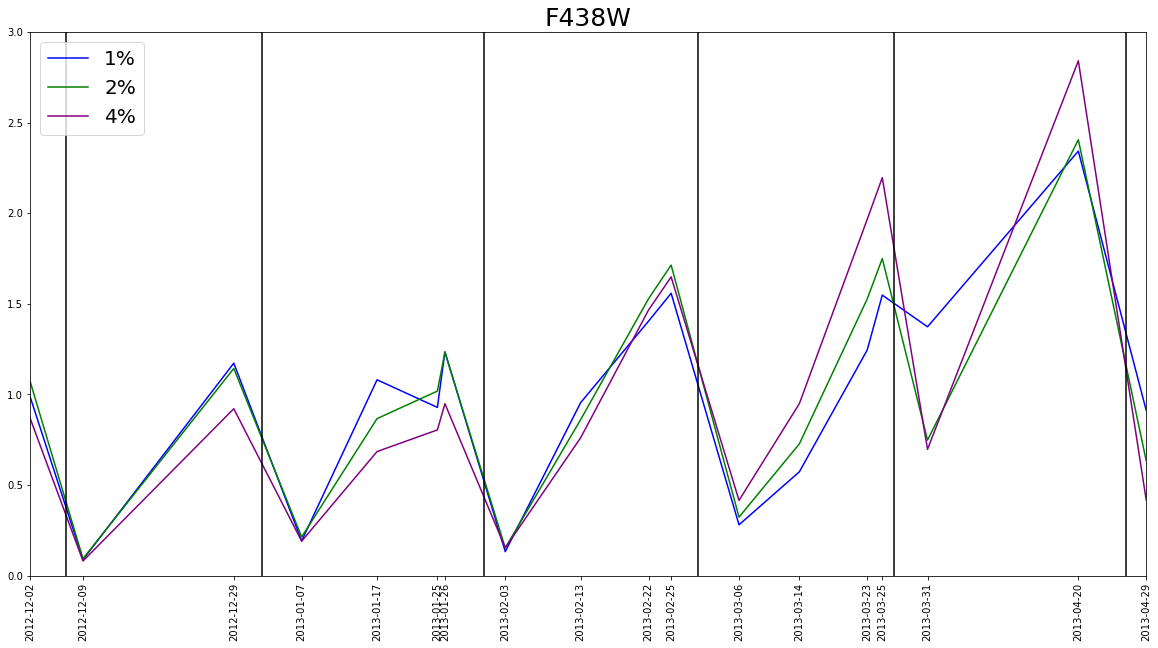

In [71]:
#reproduce ISR plot
#grab F438W dat
F438W_df = dat_Frame[dat_Frame['filter']=='F438W']
#print F438W_df

F438W_df_1_10 = F438W_df[(F438W_df['lower_bound']== '-10.0') & (F438W_df['upper_bound']== '-1.0')]
F438W_df_2_10 = F438W_df[(F438W_df['lower_bound']== '-10.0') & (F438W_df['upper_bound']== '-2.0')]
F438W_df_4_10 = F438W_df[(F438W_df['lower_bound']== '-10.0') & (F438W_df['upper_bound']== '-4.0')]

fig = plt.figure(figsize = (20,10))
#date_obs_num_sorted = sorted(F438W_df_1_10['date_obs'])
sorted_1_10= sorted(zip(F438W_df_1_10['date_obs'],F438W_df_1_10['num_pix_tot']))
date_1_10 = [item[0] for item in sorted_1_10]
num_1_10 = np.array([item[1] for item in sorted_1_10])/np.mean(np.array([item[1] for item in sorted_1_10]))
plt.plot(date_1_10,num_1_10,label='1%',c='blue')

sorted_2_10= sorted(zip(F438W_df_2_10['date_obs'],F438W_df_2_10['num_pix_tot']))
date_2_10 = [item[0] for item in sorted_2_10]
num_2_10 = np.array([item[1] for item in sorted_2_10])/np.mean(np.array([item[1] for item in sorted_2_10]))
plt.plot(date_2_10,num_2_10,label='2%',c='green')

sorted_4_10= sorted(zip(F438W_df_4_10['date_obs'],F438W_df_4_10['num_pix_tot']))
date_4_10 = [item[0] for item in sorted_4_10]
num_4_10 = np.array([item[1] for item in sorted_4_10])/np.mean(np.array([item[1] for item in sorted_4_10]))
plt.plot(date_4_10,num_4_10,label='4%',c= 'purple')


plt.legend(loc=2,fontsize = 20, fancybox=True)
plt.title('F438W',fontsize = 25)
plt.ylim(0,3.0)
x_vals = F438W_df['date_obs'].tolist()
x_vals = set([float(item) for item in x_vals])
x_vals = [item for item in x_vals]
t = Time(x_vals,format = 'mjd')
x_labels =[item[0:10] for item in t.isot]
plt.xticks(x_vals,x_labels, rotation='vertical')

plt.xlim(min(F438W_df_1_10['date_obs']),max(F438W_df_1_10['date_obs']))
for anneal_mjd in set(dat_Frame['anneal_mjd']):
    plt.axvline(float(anneal_mjd),c='k')

    

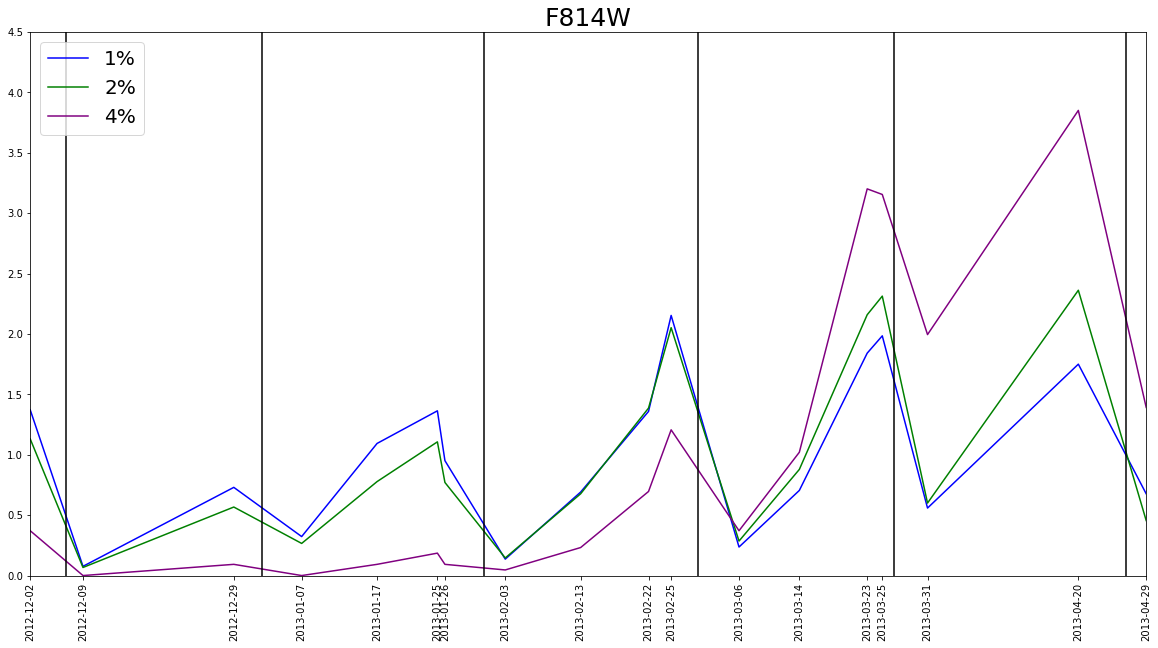

In [73]:
#reproduce ISR plot
#grab F438W dat
F814W_df = dat_Frame[dat_Frame['filter']=='F814W']
#print F438W_df

F814W_df_1_10 = F814W_df[(F814W_df['lower_bound']== '-10.0') & (F814W_df['upper_bound']== '-1.0')]
F814W_df_2_10 = F814W_df[(F814W_df['lower_bound']== '-10.0') & (F814W_df['upper_bound']== '-2.0')]
F814W_df_4_10 = F814W_df[(F814W_df['lower_bound']== '-10.0') & (F814W_df['upper_bound']== '-4.0')]

fig = plt.figure(figsize = (20,10))
#date_obs_num_sorted = sorted(F438W_df_1_10['date_obs'])
sorted_1_10= sorted(zip(F814W_df_1_10['date_obs'],F814W_df_1_10['num_pix_tot']))
date_1_10 = [item[0] for item in sorted_1_10]
num_1_10 = np.array([item[1] for item in sorted_1_10])/np.mean(np.array([item[1] for item in sorted_1_10]))
plt.plot(date_1_10,num_1_10,label='1%',c='blue')

sorted_2_10= sorted(zip(F814W_df_2_10['date_obs'],F814W_df_2_10['num_pix_tot']))
date_2_10 = [item[0] for item in sorted_2_10]
num_2_10 = np.array([item[1] for item in sorted_2_10])/np.mean(np.array([item[1] for item in sorted_2_10]))
plt.plot(date_2_10,num_2_10,label='2%',c='green')

sorted_4_10= sorted(zip(F814W_df_4_10['date_obs'],F814W_df_4_10['num_pix_tot']))
date_4_10 = [item[0] for item in sorted_4_10]
num_4_10 = np.array([item[1] for item in sorted_4_10])/np.mean(np.array([item[1] for item in sorted_4_10]))
plt.plot(date_4_10,num_4_10,label='4%',c= 'purple')


plt.legend(loc=2,fontsize = 20, fancybox=True)
plt.title('F814W',fontsize = 25)
plt.ylim(0,4.5)
x_vals = F814W_df['date_obs'].tolist()
x_vals = set([float(item) for item in x_vals])
x_vals = [item for item in x_vals]
t = Time(x_vals,format = 'mjd')
x_labels =[item[0:10] for item in t.isot]
plt.xticks(x_vals,x_labels, rotation='vertical')

plt.xlim(min(F814W_df_1_10['date_obs']),max(F814W_df_1_10['date_obs']))
for anneal_mjd in set(dat_Frame['anneal_mjd']):
    plt.axvline(float(anneal_mjd),c='k')


    